<a href="https://colab.research.google.com/github/DieKim/SBA-Elice_Project_NLP/blob/main/sba_project_emoing/Pretrained_w2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본적인 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

df_train = pd.read_csv('/content/drive/MyDrive/sentimental_analysis_project/data/train.txt', header =None, sep =';', names = ['Sentence','Emotion'], encoding='utf-8')
df_test = pd.read_csv('/content/drive/MyDrive/sentimental_analysis_project/data/test.txt', header = None, sep =';', names = ['Sentence','Emotion'],encoding='utf-8')
df_val=pd.read_csv('/content/drive/MyDrive/sentimental_analysis_project/data/val.txt',header=None,sep=';',names=['Sentence','Emotion'],encoding='utf-8')

import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_train['Sentence'].str.lower().str.cat(sep=' ')) 

# nltk에서 지원하는 'stopwords'를 다운받습니다.
nltk.download('stopwords')

# 영어 'stopwords'를 가져옵니다.
en_stops = set(stopwords.words('english'))

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [word for word in tokens if word not in stopwords.words('english')]

#filtered_sentence

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:


# 분리된 토큰들이 저장될 list를 초기화 합니다.
token_sentence = []

for sentence in df_train['Sentence']:
    # word_tokenize 함수를 사용하여 문장을 토큰으로 분리합니다.
    # word_tokenize 사용
    i = word_tokenize(sentence)
    # 분리된 토큰들을 저장합니다.

    # token_sentence에 저장
    token_sentence.append(i)
    
filtered_sentence = []
stop_words = set(stopwords.words('english'))
for sentence in token_sentence:
    # stopword 제거
    word_token = [word for word in sentence if word not in stopwords.words('english')]
    filtered_sentence.append(word_token)

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemming_sentence = []

for sentence in filtered_sentence:
    # stemmer의 사용법을 검색하여 word를 stemming해주세요
    word_token = [stemmer.stem(i) for i in sentence]
    stemming_sentence.append(word_token)

from  keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer(oov_token='UNK')
## tokenizer를 이용하여 BoW만들기
tokenizer.fit_on_texts(stemming_sentence)



In [ ]:
stemming_sentence_train = []
stemming_sentence_val = []
stemming_sentence_test = []



for sentence in df_train['Sentence']:
    ## training데이터에서 했던것처럼, word_tokenizer와 stemmer를 사용하여 word token sequence로 만들어주세요
    i = word_tokenize(sentence)
    word_token = [word for word in i if word not in stopwords.words('english')]
    word_token = [stemmer.stem(j) for j in word_token]
    stemming_sentence_train.append(word_token)

for sentence in df_val['Sentence']:
    ## training데이터에서 했던것처럼, word_tokenizer와 stemmer를 사용하여 word token sequence로 만들어주세요
    i = word_tokenize(sentence)
    word_token = [word for word in i if word not in stopwords.words('english')]
    word_token = [stemmer.stem(j) for j in word_token]
    stemming_sentence_val.append(word_token)
    
for sentence in df_test['Sentence']:
    ## training데이터에서 했던것처럼, word_tokenizer와 stemmer를 사용하여 word token sequence로 만들어주세요
    i = word_tokenize(sentence)
    word_token = [word for word in i if word not in stopwords.words('english')]
    word_token = [stemmer.stem(j) for j in word_token]
    stemming_sentence_test.append(word_token)

## stemming_sentence_val, test를 bow로 표현하기

X_train=tokenizer.texts_to_sequences(stemming_sentence_train)
X_val=tokenizer.texts_to_sequences(stemming_sentence_val)
X_test=tokenizer.texts_to_sequences(stemming_sentence_test)

## X_vala과 X_test를 padding을 붙여 일정길이로 만들어주기
X_train_pad=pad_sequences(X_train, maxlen=35, padding='post')
X_val_pad=pad_sequences(X_val, maxlen=35, padding='post')
X_test_pad=pad_sequences(X_test, maxlen=35, padding='post')

try:
    df_train['Emotion']=df_train['Emotion'].replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
    df_val['Emotion']=df_val['Emotion'].replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
    df_test['Emotion']=df_test['Emotion'].replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
except: pass

y_train = np.array(df_train['Emotion'].values)
y_val = np.array(df_val['Emotion'].values)
y_test = np.array(df_test['Emotion'].values)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Input, concatenate
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dropout, BatchNormalization, Activation, Conv1D, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.layers import Embedding, Bidirectional, Flatten
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import Callback

# 일반 모델

In [ ]:
sequence_length = 35 # max(num_token_per_sentence)
vocabulary_size = len(tokenizer.word_index)+1 # 10376
embedding_dim = 256

In [ ]:
## 기본모델, 임베딩 레이어 위에 LSTM모델이 두 층, 그 위에 덴스레이어가 위치하도록 모델을 디자인해주세요
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=sequence_length, mask_zero=True))
model.add(LSTM(80, return_sequences=True))
model.add(LSTM(160))
model.add(Dense(6,activation='softmax'))

## 모델구조보기
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 35, 256)           2656512   
_________________________________________________________________
lstm_20 (LSTM)               (None, 35, 80)            107840    
_________________________________________________________________
lstm_21 (LSTM)               (None, 160)               154240    
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 966       
Total params: 2,919,558
Trainable params: 2,919,558
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
input_ = Input(shape=((sequence_length)))
x1 = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=sequence_length, mask_zero=True)(input_)
x1 = Dropout(0.3)(x1)


#x2 = LSTM(64, return_sequences=True)(x1)
#x2 = LSTM(128)(x2)
x2 = Bidirectional(LSTM(64, return_sequences=True))(x1)
x2 = Bidirectional(LSTM(128))(x2)
x2 = Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.05), bias_regularizer=keras.regularizers.l2(0.05))(x2)
x2_model = Model(input_, x2)

x3 = Conv1D(128, 3, activation='relu', padding='valid', use_bias = True)(x1)
x3 = GlobalMaxPooling1D()(x3)
x3 = Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.05), bias_regularizer=keras.regularizers.l2(0.05))(x3)
x3_model = Model(input_, x3)

x4 = concatenate([x2_model.output,x3_model.output])
x4 = Dropout(0.5)(x4)
x4 = Dense(6,activation='softmax')(x4)

model = Model(input_, x4)
tf.keras.utils.plot_model(model, show_shapes=True)
#print(model.summary())

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=sequence_length, mask_zero=True))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80, return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
#model.add(Dense(256, activation='swish', kernel_regularizer=keras.regularizers.l2(0.05), bias_regularizer=keras.regularizers.l2(0.05)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='swish', kernel_regularizer=keras.regularizers.l2(0.05), bias_regularizer=keras.regularizers.l2(0.05)))
#model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

# 모델 학습

In [ ]:
## 모델 compile option주기 tf.keras.optimizers.RMSprop(learning_rate=0.001)
#model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#from tensorflow.keras.callbacks import ModelCheckpoink              val_accuracy
filepath = '/content/drive/MyDrive/sentimental_analysis_project/best_modelwv.hdf5'
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor = 'val_loss', verbose =1, save_best_only = True),]
             #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='auto'),]
             #tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, verbose=1, min_lr=0)]

## 모델 학습하기
# X_val_pad, y_val을 가지고 validation성능을 확인하며 학습할 수 있도록 해주세요.
history = model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), batch_size=64, epochs=10)#, callbacks=callbacks)
#history = model.fit(concatenate((X_train_pad,X_val_pad),axis=0), concatenate((y_train,y_val),axis=0), validation_data=(X_test_pad, y_test), batch_size=64, epochs=30, callbacks=callbacks)
#history = model.fit(X_all_pad, y_all, validation_data=(X_val_pad, y_val), batch_size=64, epochs=10)#, callbacks=callbacks)
#history = model.fit(X_test_pad, y_test, batch_size=64, epochs=100, validation_data=(X_test_pad, y_test), callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor = 'val_accuracy', verbose =1, save_best_only = True),tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, verbose=1, mode='auto')])

test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print('test set accuracy: ', test_accuracy)

Epoch 1/10
250/250 [==============================] - 16s 43ms/step - loss: 1.3660 - accuracy: 0.4504 - val_loss: 0.4588 - val_accuracy: 0.8490
Epoch 2/10
250/250 [==============================] - 9s 35ms/step - loss: 0.2753 - accuracy: 0.9063 - val_loss: 0.3391 - val_accuracy: 0.8875
Epoch 3/10
250/250 [==============================] - 9s 35ms/step - loss: 0.1328 - accuracy: 0.9512 - val_loss: 0.3217 - val_accuracy: 0.8860
Epoch 4/10
250/250 [==============================] - 9s 34ms/step - loss: 0.0914 - accuracy: 0.9672 - val_loss: 0.3509 - val_accuracy: 0.8915
Epoch 5/10
250/250 [==============================] - 9s 35ms/step - loss: 0.0627 - accuracy: 0.9770 - val_loss: 0.3803 - val_accuracy: 0.8880
Epoch 6/10
250/250 [==============================] - 9s 34ms/step - loss: 0.0453 - accuracy: 0.9827 - val_loss: 0.4144 - val_accuracy: 0.8900
Epoch 7/10
250/250 [==============================] - 9s 35ms/step - loss: 0.0515 - accuracy: 0.9810 - val_loss: 0.4730 - val_accuracy: 0.884

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print('test set accuracy: ', test_accuracy)

63/63 [==============================] - 1s 8ms/step - loss: 0.1607 - accuracy: 0.9325
test set accuracy:  0.9325000047683716


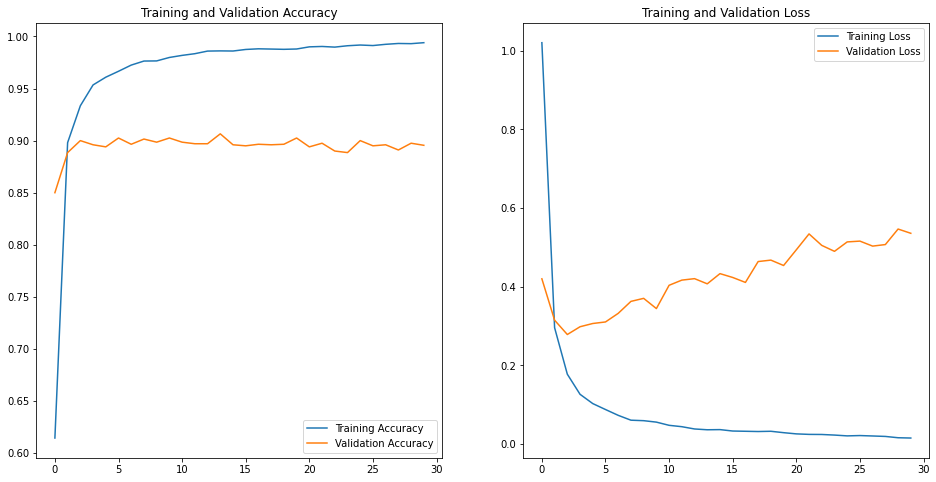

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Pretrained W2V 적용하기

In [ ]:


# 분리된 토큰들이 저장될 list를 초기화 합니다.
token_sentence = []

for sentence in df_train['Sentence']:
    # word_tokenize 함수를 사용하여 문장을 토큰으로 분리합니다.
    # word_tokenize 사용
    i = word_tokenize(sentence)
    # 분리된 토큰들을 저장합니다.

    # token_sentence에 저장
    token_sentence.append(i)
    
filtered_sentence = []
stop_words = set(stopwords.words('english'))
for sentence in token_sentence:
    # stopword 제거
    word_token = [word for word in sentence if word not in stopwords.words('english')]
    filtered_sentence.append(word_token)

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemming_sentence = []

for sentence in filtered_sentence:
    # stemmer의 사용법을 검색하여 word를 stemming해주세요
    word_token = [stemmer.stem(i) for i in sentence]
    stemming_sentence.append(word_token)

from  keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer(oov_token='UNK')
## tokenizer를 이용하여 BoW만들기
tokenizer.fit_on_texts(stemming_sentence)



In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

In [ ]:
embedding_dict = dict()
f = open(os.path.join('glove.6B.300d.txt'), encoding='utf-8')
for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') 
    embedding_dict[word] = word_vector_arr
f.close()

In [ ]:
#사전 훈련된 wv로 단어사전 만들기
from  keras.preprocessing.text import Tokenizer
a=[]
for key, value in embedding_dict.items():
    a.append(key)

tokenizer=Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts([a])
vocabulary_size = len(tokenizer.word_index)+1

In [ ]:
embedding_dim = 300
embedding_matrix = np.zeros((vocabulary_size, embedding_dim))
count=0
noword=[]
noi=[]

for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else: count +=1; noword.append(word);noi.append(i)
print(count)
print(noword)
print(noi)

1
['UNK']
[1]


In [ ]:
stemming_sentence_train = []
stemming_sentence_val = []
stemming_sentence_test = []



for sentence in df_train['Sentence']:
    ## training데이터에서 했던것처럼, word_tokenizer와 stemmer를 사용하여 word token sequence로 만들어주세요
    i = word_tokenize(sentence)
    word_token = [word for word in i if word not in stopwords.words('english')]
    stemming_sentence_train.append(word_token)

for sentence in df_val['Sentence']:
    ## training데이터에서 했던것처럼, word_tokenizer와 stemmer를 사용하여 word token sequence로 만들어주세요
    i = word_tokenize(sentence)
    word_token = [word for word in i if word not in stopwords.words('english')]
    stemming_sentence_val.append(word_token)
    
for sentence in df_test['Sentence']:
    ## training데이터에서 했던것처럼, word_tokenizer와 stemmer를 사용하여 word token sequence로 만들어주세요
    i = word_tokenize(sentence)
    word_token = [word for word in i if word not in stopwords.words('english')]
    stemming_sentence_test.append(word_token)

## stemming_sentence_val, test를 bow로 표현하기

X_train=tokenizer.texts_to_sequences(stemming_sentence_train)
X_val=tokenizer.texts_to_sequences(stemming_sentence_val)
X_test=tokenizer.texts_to_sequences(stemming_sentence_test)

## X_vala과 X_test를 padding을 붙여 일정길이로 만들어주기
X_train_pad=pad_sequences(X_train, maxlen=35, padding='post')
X_val_pad=pad_sequences(X_val, maxlen=35, padding='post')
X_test_pad=pad_sequences(X_test, maxlen=35, padding='post')

try:
    df_train['Emotion']=df_train['Emotion'].replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
    df_val['Emotion']=df_val['Emotion'].replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
    df_test['Emotion']=df_test['Emotion'].replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
except: pass

y_train = np.array(df_train['Emotion'].values)
y_val = np.array(df_val['Emotion'].values)
y_test = np.array(df_test['Emotion'].values)

In [ ]:
# 반드시 눌러주셔야 합니다!!
sequence_length = 35 # max(num_token_per_sentence)
vocabulary_size = len(tokenizer.word_index)+1 
embedding_dim = 300

# W2V 데이터 모델

In [ ]:
sequence_length = 35 # max(num_token_per_sentence)
vocabulary_size = len(tokenizer.word_index)+1 
embedding_dim = 300

In [ ]:
input_ = Input(shape=((sequence_length)))
x1 = Embedding( input_dim=vocabulary_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=sequence_length, trainable=False, mask_zero=True)(input_)
x1 = Dropout(0)(x1)


#x2 = LSTM(64, return_sequences=True)(x1)
#x2 = LSTM(128)(x2)
x2 = Bidirectional(LSTM(64, return_sequences=True))(x1)
x2 = Bidirectional(LSTM(128))(x2)
x2 = Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.05), bias_regularizer=keras.regularizers.l2(0.05))(x2)
x2_model = Model(input_, x2)

x3 = Conv1D(128, 3, activation='relu', padding='valid', use_bias = True)(x1)
x3 = GlobalMaxPooling1D()(x3)
x3 = Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.05), bias_regularizer=keras.regularizers.l2(0.05))(x3)
x3_model = Model(input_, x3)

x4 = concatenate([x2_model.output,x3_model.output])
x4 = Dropout(0.5)(x4)
x4 = Dense(6,activation='softmax')(x4)

model = Model(input_, x4)
tf.keras.utils.plot_model(model, show_shapes=True)
#print(model.summary())

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=sequence_length, trainable=False, mask_zero=True))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80, return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
#model.add(Dense(256, activation='swish', kernel_regularizer=keras.regularizers.l2(0.05), bias_regularizer=keras.regularizers.l2(0.05)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='swish', kernel_regularizer=keras.regularizers.l2(0.05), bias_regularizer=keras.regularizers.l2(0.05)))
#model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

# 스코어 데이터 예측하기

In [ ]:
df_score = pd.read_csv("/content/drive/MyDrive/sentimental_analysis_project/score.csv")#,header=0, sep=';',names=['Sentence'],encoding='utf-8'))
df_score
#df_score = pd.read_csv(‘/content/drive/MyDrive/sentimental_analysis_project/score.csv’,header=0, sep=’;’,names=[‘Sentence’],encoding=’utf-8’))	
stemming_sentence_score = []	

for sentence in df_score['Sentence']:	
## training데이터에서 했던것처럼, word_tokenizer와 stemmer를 사용하여 word token sequence로 만들어주세요	
    i = word_tokenize(sentence)
    word_token = [word for word in i if word not in stopwords.words('english')]
#    word_token = [stemmer.stem(j) for j in word_token]
    stemming_sentence_score.append(word_token)
    

#    word_token = word_tokenize(sentence) # toknize	
#    word_token = [word for word in word_token if not word in stop_words] # remove stopwords	
#    word_token = [stemmer.stem(word) for word in word_token] # stemming(어간추출)	
#	  stemming_sentence_score.append(word_token)
	
X_score = tokenizer.texts_to_sequences(stemming_sentence_score)	
	
X_score_pad = pad_sequences(X_score, maxlen=35, padding='post')	
	
score_prediction = model.predict(X_score_pad)	
	
score_prediction_label = [np.argmax(score_prediction[i]) for i in range(len(score_prediction))]	
len(score_prediction_label)	
	
submission_df = pd.DataFrame({'Emotion' : score_prediction_label})	
submission_df	
	
submission_df.to_csv('/content/drive/MyDrive/sentimental_analysis_project/submission.csv', index=False,)	

In [ ]:
df_score = pd.read_csv("/content/drive/MyDrive/sentimental_analysis_project/score.csv")#,header=0, sep=';',names=['Sentence'],encoding='utf-8'))
df_score
#df_score = pd.read_csv(‘/content/drive/MyDrive/sentimental_analysis_project/score.csv’,header=0, sep=’;’,names=[‘Sentence’],encoding=’utf-8’))	
stemming_sentence_score = []	

for sentence in df_score['Sentence']:	
## training데이터에서 했던것처럼, word_tokenizer와 stemmer를 사용하여 word token sequence로 만들어주세요	
    i = word_tokenize(sentence)
    word_token = [word for word in i if word not in stopwords.words('english')]
#    word_token = [stemmer.stem(j) for j in word_token]
    stemming_sentence_score.append(word_token)
    

#    word_token = word_tokenize(sentence) # toknize	
#    word_token = [word for word in word_token if not word in stop_words] # remove stopwords	
#    word_token = [stemmer.stem(word) for word in word_token] # stemming(어간추출)	
#	  stemming_sentence_score.append(word_token)
	
X_score = tokenizer.texts_to_sequences(stemming_sentence_score)	
	
X_score_pad = pad_sequences(X_score, maxlen=35, padding='post')	
	
score_prediction = model.predict(X_score_pad)	
np.save('/content/drive/MyDrive/sentimental_analysis_project/LSTM&CNN1D.npy',score_prediction )



In [ ]:
ll = np.load('/content/drive/MyDrive/sentimental_analysis_project/LSTM&CNN1D.npy')
ll

array([[9.9975926e-01, 8.1503576e-06, 7.3266950e-05, 1.3238897e-04,
        1.5985233e-06, 2.5355952e-05],
       [9.9979228e-01, 9.4350225e-06, 1.0698529e-04, 4.7954087e-05,
        8.2188940e-08, 4.3268199e-05],
       [4.4939024e-03, 3.3364472e-06, 9.9420071e-01, 9.2084624e-04,
        3.5307626e-04, 2.8115232e-05],
       ...,
       [2.9845646e-06, 1.7020750e-05, 2.0035166e-06, 2.6773467e-05,
        9.9982244e-01, 1.2879238e-04],
       [2.0985362e-01, 1.6654173e-03, 3.6561799e-03, 2.9422881e-03,
        9.3717668e-03, 7.7251077e-01],
       [2.3504961e-04, 1.4460851e-04, 4.9762679e-05, 9.9952793e-01,
        3.4636967e-05, 8.0715699e-06]], dtype=float32)

# Kfold 가져온 코드

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

In [ ]:
sequence_length = 35 # max(num_token_per_sentence)
vocabulary_size = len(tokenizer.word_index)+1 # 10376
embedding_dim = 256

In [ ]:
## https://www.tensorflow.org/tutorials/text/text_classification_rnn

from tensorflow.keras.layers import Bidirectional

model = Sequential([            
  Embedding(vocabulary_size, embedding_dim, mask_zero=True),
  Bidirectional(LSTM(64,  return_sequences=True)),
  Bidirectional(LSTM(32)),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(6, activation = 'softmax')
])

# 모델구조보기
print(model.summary())

## 모델 compile option주기
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=sequence_length, trainable=False, mask_zero=True))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80, return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np

X_all_pad= np.concatenate((X_train_pad,X_val_pad,X_test_pad),axis=0)
y_all = np.concatenate((y_train,y_val,y_test),axis=0)

In [ ]:
print(X_train_pad)
print('-----')
print(X_all_pad)
print('-----')
print(y_train)
print('-----')
print(y_all)

[[93327  1000 18631 ...     0     0     0]
 [  244  2520 21215 ...     0     0     0]
 [14665 14195  1216 ...     0     0     0]
 ...
 [ 1000   564   221 ...     0     0     0]
 [ 1000   119 16693 ...     0     0     0]
 [  348   532  1000 ...     0     0     0]]
-----
[[ 59   2   1 ...   0   0   0]
 [ 10   1 383 ...   0   0   0]
 [  4   1   1 ...   0   0   0]
 ...
 [  2   1   1 ...   0   0   0]
 [  4   1   1 ...   0   0   0]
 [  2 171 403 ...   0   0   0]]
-----
[3 3 1 ... 0 1 3]
-----
[3 3 1 ... 0 0 4]


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print('test set accuracy: ', test_accuracy)

63/63 [==============================] - 1s 8ms/step - loss: 0.1870 - accuracy: 0.9315
test set accuracy:  0.9315000176429749


In [ ]:
# to split train/test datasets having equal classes proportion >> StratifiedKFold 
from sklearn.model_selection import StratifiedKFold 

skf = StratifiedKFold(shuffle=True, random_state=42) # n_splits = 5

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

fold_no = 1
for train_idx, test_idx in skf.split(X_train_pad, y_train):
  print("TRAIN:", train_idx, "TEST:", test_idx)

  X_trainsp, X_testsp, y_trainsp, y_testsp = X_train_pad[train_idx], X_train_pad[test_idx], y_train[train_idx], y_train[test_idx]
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  
  # Fit data to model
  history = model.fit(X_train_pad[train_idx], y_train[train_idx], batch_size=64, epochs=2, validation_data=(X_val_pad, y_val))#, callbacks=callbacks

  # Generate generalization metrics
  scores = model.evaluate(X_train_pad[test_idx], y_train[test_idx], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


In [ ]:
# 합친 데이터로 학습
# to split train/test datasets having equal classes proportion >> StratifiedKFold 
from sklearn.model_selection import StratifiedKFold 

skf = StratifiedKFold(shuffle=True, random_state=42) # n_splits = 5

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

fold_no = 1
for train_idx, test_idx in skf.split(X_all_pad, y_all):
  print("TRAIN:", train_idx, "TEST:", test_idx)

  #X_trainsp, X_testsp, y_trainsp, y_testsp = X_all_pad[train_idx], X_all_pad[test_idx], y_all[train_idx], y_all[test_idx]
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  
  # Fit data to model
  history = model.fit(X_all_pad[train_idx], y_all[train_idx], batch_size=64, epochs=10)  #, callbacks=callbacks, validation_data=(X_all_pad[test_idx], y_all[test_idx])

  # Generate generalization metrics
  scores = model.evaluate(X_all_pad[test_idx], y_all[test_idx], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
print(df_score['Sentence'][720])
print(df_test['Sentence'][2])
print(df_test['Sentence'][2]==df_score['Sentence'][720])

i never make her separate from me because i don t ever want her to feel like i m ashamed with her
i never make her separate from me because i don t ever want her to feel like i m ashamed with her
True


In [ ]:
l=[]
for i in range(len(df_test['Sentence'])): 
  for j in range(len(df_score['Sentence'])):
    if df_test['Sentence'][i] == df_score['Sentence'][j]: l.append((i,j))

#print('전체 스코어데이터 수 : ', len(df_score['Sentence']))
print('테스트셋에 있는 스코어데이터 / 전체 스코어데이터 : ', len(l)/len(df_score['Sentence']))
print('테스트데이터 중 스코어 데이터에 포함된 데이터의 번호(test, score):', l)


테스트셋에 있는 스코어데이터 / 전체 스코어데이터 :  1.0
테스트데이터 중 스코어 데이터에 포함된 데이터의 번호(test, score): [(0, 91), (2, 720), (3, 529), (4, 274), (11, 503), (12, 656), (14, 153), (15, 773), (16, 62), (17, 883), (18, 556), (20, 662), (21, 814), (22, 270), (23, 292), (25, 197), (27, 673), (28, 577), (29, 543), (31, 693), (32, 441), (34, 407), (35, 417), (36, 13), (37, 24), (40, 791), (42, 990), (43, 41), (45, 889), (50, 75), (51, 77), (53, 986), (54, 97), (56, 871), (57, 161), (60, 841), (61, 708), (63, 255), (71, 398), (72, 431), (73, 333), (77, 538), (78, 397), (80, 447), (84, 136), (86, 666), (89, 112), (90, 399), (91, 219), (92, 305), (94, 314), (95, 991), (99, 335), (100, 631), (101, 279), (102, 177), (105, 908), (109, 915), (110, 306), (111, 783), (115, 815), (116, 597), (118, 273), (119, 743), (120, 459), (121, 493), (123, 294), (125, 383), (127, 165), (128, 276), (135, 816), (136, 948), (140, 93), (141, 64), (143, 569), (145, 507), (147, 109), (148, 830), (149, 829), (150, 951), (151, 94), (152, 139), (153